# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [52]:
sinasc_raw['munResLat'].max()

-8.76889

In [7]:
sinasc_raw['munResLat'].min()

-13.49976

In [46]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
cut = pd.cut(sinasc_raw['munResLat'], [-13,-10.5,-8])

In [6]:
cut.value_counts()

(-10.5, -8.0]     14034
(-13.0, -10.5]    12422
Name: munResLat, dtype: int64

In [16]:
sinasc_raw.pivot_table(values = ['munResAlt', 'IDADEMAE'], index = [cut],
                       aggfunc =['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

sum                  mean                  min            \
               IDADEMAE  munResAlt   IDADEMAE   munResAlt IDADEMAE munResAlt   
munResLat                                                                      
(-13.0, -10.5]   324694  3132768.0  26.138625  252.195138       12     133.0   
(-10.5, -8.0]    365094  1530415.0  26.014964  109.050520       11      85.0   

                    max             median                 std              \
               IDADEMAE munResAlt IDADEMAE munResAlt  IDADEMAE   munResAlt   
munResLat                                                                    
(-13.0, -10.5]       53     595.0       26     191.0  6.312829  141.195394   
(-10.5, -8.0]        52     192.0       25      87.0  6.447663   30.071422   

                      var               
                 IDADEMAE    munResAlt  
munResLat                               
(-13.0, -10.5]  39.851806  19936.13936  
(-10.5, -8.0]   41.572355    904.29040

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [82]:
sinasc_raw.munResArea.max()

34096.394

In [17]:
cut_2 = pd.cut(sinasc_raw['munResArea'], [100, 3000, 34100])

In [18]:
sinasc_raw.pivot_table(values = ['PESO', 'IDADEPAI'], index = [cut_2],
                       aggfunc =['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

sum                 mean                   min       \
               IDADEPAI      PESO   IDADEPAI         PESO IDADEPAI PESO   
munResArea                                                                
(100, 3000]     78074.0  16796616  31.092792  3218.359073     16.0  258   
(3000, 34100]  158424.0  70857126  31.094014  3249.134538     15.0  292   

                   max         median             std                    var  \
              IDADEPAI  PESO IDADEPAI  PESO  IDADEPAI        PESO   IDADEPAI   
munResArea                                                                     
(100, 3000]       69.0  5720     30.0  3245  7.675474  531.583103  58.912900   
(3000, 34100]     86.0  5985     30.0  3280  7.818364  547.716582  61.126809   

                              
                        PESO  
munResArea                    
(100, 3000]    282580.595074  
(3000, 34100]  299993.453720

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [20]:
cut_3 = pd.cut(sinasc_raw['munResAlt'], 3)

In [21]:
sinasc_raw.pivot_table(values = ['QTDGESTANT', 'SEMAGESTAC'], index = [cut_3],
                       aggfunc =['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

sum                  mean                   min  \
               QTDGESTANT SEMAGESTAC QTDGESTANT SEMAGESTAC QTDGESTANT   
munResAlt                                                               
(84.49, 255.0]    28530.0   848616.0   1.296641  38.557681        0.0   
(255.0, 425.0]     2573.0    84583.0   1.155366  38.569539        0.0   
(425.0, 595.0]     1813.0    61417.0   1.143849  38.700063        0.0   

                                 max                median             \
               SEMAGESTAC QTDGESTANT SEMAGESTAC QTDGESTANT SEMAGESTAC   
munResAlt                                                               
(84.49, 255.0]       19.0       52.0       45.0        1.0       39.0   
(255.0, 425.0]       22.0       12.0       45.0        1.0       39.0   
(425.0, 595.0]       22.0        9.0       44.0        1.0       39.0   

                      std                   var             
               QTDGESTANT SEMAGESTAC QTDGESTANT SEMAGESTAC  
munResAlt                                                   
(84.49, 255.0]   1.428584   2.028771   2.040852   4.115913  
(255.0, 425.0]   1.275987   1.974246   1.628142   3.897648  
(425.0, 595.0]   1.213664   1.901289   1.472981   3.614899

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [3]:
idade = sinasc_raw[['IDADEMAE', 'munResNome']]
idade_media = idade.groupby('munResNome', as_index = False).agg('mean')

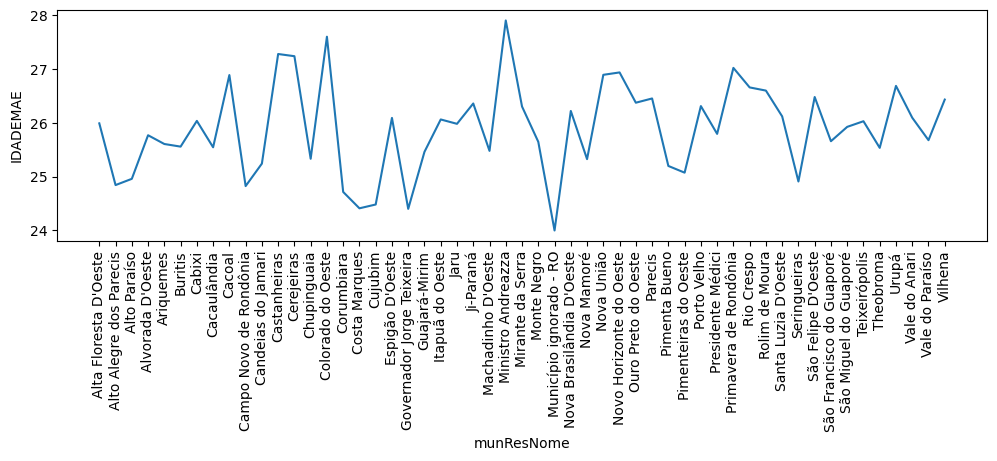

In [12]:
plt.rc('figure', figsize=(12, 3))
sns.lineplot(x = 'munResNome', y = 'IDADEMAE', data = idade_media).tick_params(axis="x", rotation = 90)

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


In [43]:
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))

### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [45]:
faixas_idh = pd.cut(dados_ro['idh'], [0, 0.599, 0.699, 0.799])

In [46]:
faixas_idh = dados_ro.pivot_table(index = ['regiao', faixas_idh])

C:\Users\Tauan\AppData\Local\Temp\ipykernel_6288\4274007652.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  faixas_idh = dados_ro.pivot_table(index = ['regiao', faixas_idh])


In [47]:
faixas_idh

idh      ifdm           pib
regiao      idh                                             
Ariquemes   (0.0, 0.599]    0.593000  0.527200  2.088210e+05
            (0.599, 0.699]  0.624833  0.585933  3.136068e+05
            (0.699, 0.799]  0.702000  0.774600  2.579830e+06
Cacoal      (0.0, 0.599]    0.592000  0.504600  2.134100e+05
            (0.599, 0.699]  0.646300  0.600010  2.186496e+05
            (0.699, 0.799]  0.709333  0.709300  1.569985e+06
Jaru        (0.0, 0.599]    0.591250  0.524975  2.567090e+05
            (0.599, 0.699]  0.689000  0.645000  1.500890e+06
Ji-Paraná   (0.0, 0.599]    0.592500  0.574650  1.308875e+05
            (0.599, 0.699]  0.637900  0.607020  3.131905e+05
            (0.699, 0.799]  0.714000  0.711700  3.783972e+06
Porto Velho (0.0, 0.599]    0.587000  0.508400  5.290000e+05
            (0.599, 0.699]  0.640000  0.588100  5.234503e+05
            (0.699, 0.799]  0.736000  0.725700  1.791207e+07
Vilhena     (0.599, 0.699]  0.659500  0.625383  2.350560e+05
            (0.699, 0.799]  0.731000  0.746500  2.831175e+06

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [48]:
faixas_ifdm = pd.cut(dados_ro['ifdm'], [0, 0.399, 0.599, 0.799])

In [51]:
faixas_ifdm = dados_ro.pivot_table(index = ['regiao', faixas_ifdm])

C:\Users\Tauan\AppData\Local\Temp\ipykernel_6288\2124916519.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  faixas_ifdm = dados_ro.pivot_table(index = ['regiao', faixas_ifdm])


In [52]:
faixas_ifdm

idh      ifdm           pib
regiao      ifdm                                            
Ariquemes   (0.399, 0.599]  0.619000  0.544575  2.671140e+05
            (0.599, 0.799]  0.642000  0.659775  9.004590e+05
Cacoal      (0.399, 0.599]  0.636286  0.561757  2.347114e+05
            (0.599, 0.799]  0.675571  0.671471  7.809830e+05
Jaru        (0.399, 0.599]  0.591250  0.524975  2.567090e+05
            (0.599, 0.799]  0.689000  0.645000  1.500890e+06
Ji-Paraná   (0.399, 0.599]  0.618167  0.572917  1.530747e+05
            (0.599, 0.799]  0.652714  0.641957  8.941720e+05
Porto Velho (0.399, 0.599]  0.619333  0.550933  5.171170e+05
            (0.599, 0.799]  0.692500  0.672800  9.230035e+06
Vilhena     (0.399, 0.599]  0.631500  0.582300  1.506245e+05
            (0.599, 0.799]  0.685000  0.666840  7.880524e+05

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [54]:
faixas_pib = pd.cut(dados_ro['pib'], [0, 99999, 199999, 299999, 499999, 999999, 20000000])

In [55]:
faixas_pib = dados_ro.pivot_table(index = ['regiao', faixas_pib])

C:\Users\Tauan\AppData\Local\Temp\ipykernel_6288\2166956110.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  faixas_pib = dados_ro.pivot_table(index = ['regiao', faixas_pib])


In [56]:
faixas_pib

idh      ifdm           pib
regiao      pib                                                 
Ariquemes   (0, 99999]          0.643000  0.643000  7.685400e+04
            (99999, 199999]     0.646000  0.572100  1.166350e+05
            (199999, 299999]    0.600000  0.564400  2.139865e+05
            (299999, 499999]    0.618500  0.539500  3.715000e+05
            (499999, 999999]    0.616000  0.619900  7.260000e+05
            (999999, 20000000]  0.702000  0.774600  2.579830e+06
Cacoal      (0, 99999]          0.641250  0.586725  6.638250e+04
            (99999, 199999]     0.647333  0.612167  1.466553e+05
            (199999, 299999]    0.592000  0.504600  2.134100e+05
            (299999, 499999]    0.642000  0.609700  4.280000e+05
            (499999, 999999]    0.672000  0.597300  6.250000e+05
            (999999, 20000000]  0.709333  0.709300  1.569985e+06
Jaru        (99999, 199999]     0.589667  0.522567  1.312787e+05
            (499999, 999999]    0.596000  0.532200  6.330000e+05
            (999999, 20000000]  0.689000  0.645000  1.500890e+06
Ji-Paraná   (0, 99999]          0.615000  0.603550  8.221750e+04
            (99999, 199999]     0.617600  0.577820  1.588294e+05
            (199999, 299999]    0.643000  0.591900  2.040980e+05
            (299999, 499999]    0.637500  0.617700  3.905000e+05
            (499999, 999999]    0.664000  0.648000  7.250000e+05
            (999999, 20000000]  0.714000  0.711700  3.783972e+06
Porto Velho (99999, 199999]     0.614000  0.590300  1.293510e+05
            (499999, 999999]    0.631000  0.560800  6.566667e+05
            (999999, 20000000]  0.736000  0.725700  1.791207e+07
Vilhena     (0, 99999]          0.665000  0.650100  7.675600e+04
            (99999, 199999]     0.638333  0.613733  1.638600e+05
            (299999, 499999]    0.685000  0.647300  3.350000e+05
            (499999, 999999]    0.692000  0.613700  5.070000e+05
            (999999, 20000000]  0.731000  0.746500  2.831175e+06

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- A partir da analise dos dados obtidos, pude chegar às seguintes conclusões:
    - A latitude não tem relação com a idade média das mães;
    - Municípios com áreas maiores que 3000 contribui para que homens mais velhos tenham filhos. Porém a médias das idades não sofreram alterações consideráveis.